In [75]:
from math import sqrt
from numpy import concatenate
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold



data_set = pd.read_csv('/Users/shenghaoisyummy/Capstone/feature_extraction_data_dummis.csv', index_col=0)

In [76]:
list(data_set)

['arrv_late_time',
 'dprt_late_time',
 'last_node_arrv_late_time',
 'last_node_dprt_late_time',
 'last_2_node_arrv_late_time_sum',
 'last_2_node_dprt_late_time_sum',
 'last_2_node_arrv_late_time_mean',
 'last_2_node_dprt_late_time_mean',
 'last_2_node_arrv_late_time_median',
 'last_2_node_dprt_late_time_median',
 'last_2_node_arrv_late_time_std',
 'last_2_node_dprt_late_time_std',
 'last_2_node_arrv_late_time_max',
 'last_2_node_dprt_late_time_max',
 'last_2_node_arrv_late_time_min',
 'last_2_node_dprt_late_time_min',
 'last_7_node_arrv_late_time_sum',
 'last_7_node_dprt_late_time_sum',
 'last_7_node_arrv_late_time_mean',
 'last_7_node_dprt_late_time_mean',
 'last_7_node_arrv_late_time_median',
 'last_7_node_dprt_late_time_median',
 'last_7_node_arrv_late_time_std',
 'last_7_node_dprt_late_time_std',
 'last_7_node_arrv_late_time_max',
 'last_7_node_dprt_late_time_max',
 'last_7_node_arrv_late_time_min',
 'last_7_node_dprt_late_time_min',
 'last_14_node_arrv_late_time_sum',
 'last_14_no

In [77]:
data_Y = data_set[['actual_station_arrv_time_days','actual_station_arrv_time_hours','actual_station_arrv_time_minutes']]
data_set.drop(['actual_station_arrv_time_hours','actual_station_arrv_time_minutes', 'arrv_late_time', 'dprt_late_time', 'actual_station_dprt_time_hours', 'actual_station_dprt_time_minutes'], axis=1, inplace=True)


In [78]:
# data_X = data_set
data_X = VarianceThreshold(threshold=3).fit_transform(data_set)
data_X

array([[-780.,    0.,    0., ...,   57.,    1.,    1.],
       [ -60.,    0., -840., ...,    6.,    2.,    2.],
       [ -60.,    0., -120., ...,   10.,    2.,    2.],
       ...,
       [ 240.,  240.,  480., ...,   39.,   11.,   11.],
       [  60.,   60.,  300., ...,   43.,   11.,   11.],
       [  60.,    0.,  120., ...,   48.,   11.,   11.]])

In [79]:
data_Y.shape

(17953, 3)

In [80]:
# make sure value as float
data_X_values = data_X
data_X_values = data_X_values.astype('float32')

data_Y_values = data_Y.values
data_Y_values = data_Y_values.astype('float32')
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_X_values = scaler.fit_transform(data_X_values)
data_Y_values = scaler.fit_transform(data_Y_values)
# split train test
train_X, test_X, train_y, test_y = train_test_split(data_X_values, data_Y_values, test_size = 0.2, random_state = 4)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))



In [81]:
model = Sequential()

Train on 14362 samples, validate on 3591 samples
Epoch 1/10
 - 98s - loss: 0.1392 - acc: 0.6686 - val_loss: 0.0712 - val_acc: 0.8777
Epoch 2/10
 - 97s - loss: 0.1094 - acc: 0.7218 - val_loss: 0.0752 - val_acc: 0.8273
Epoch 3/10
 - 94s - loss: 0.1006 - acc: 0.7516 - val_loss: 0.0642 - val_acc: 0.8279
Epoch 4/10
 - 92s - loss: 0.0935 - acc: 0.7677 - val_loss: 0.0845 - val_acc: 0.8090
Epoch 5/10
 - 99s - loss: 0.0888 - acc: 0.7799 - val_loss: 0.0899 - val_acc: 0.7577
Epoch 6/10
 - 93s - loss: 0.0846 - acc: 0.7925 - val_loss: 0.1078 - val_acc: 0.7725
Epoch 7/10
 - 94s - loss: 0.0835 - acc: 0.7949 - val_loss: 0.1247 - val_acc: 0.7410
Epoch 8/10
 - 92s - loss: 0.0822 - acc: 0.7978 - val_loss: 0.1175 - val_acc: 0.7842
Epoch 9/10
 - 93s - loss: 0.0807 - acc: 0.8037 - val_loss: 0.1160 - val_acc: 0.7558
Epoch 10/10
 - 91s - loss: 0.0804 - acc: 0.8021 - val_loss: 0.1145 - val_acc: 0.8034


NameError: name 'mean_squared_error' is not defined

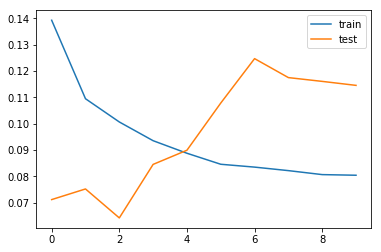

In [82]:
model.add(LSTM(10,  dropout=0.4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3, activation='relu'))

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=10, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 2:]), axis=1)
inv_yhat = scaler.inverse_transform(yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 2:]), axis=1)
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [14]:
yhat.shape

(3591, 2)

In [15]:
test_X.shape

(3591, 214)

In [16]:
inv_yhat.shape

(3591, 214)